links to rmember :


    datasets:
      https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/home?authuser=0
      
      
      https://www.kaggle.com/datasets/bahramjannesarr/goodreads-book-datasets-10m/discussion?select=book300k-400k.csv    kaggle version can give some ideas on useful features
      
      
    meetings reports: 
      https://docs.google.com/document/d/1u1gj-lFCBMWq5EHUAQfJXjPPUHh2Wusp713xlhQhuPc/edit#heading=h.khrl74ii4si
    
    also check these resources:
      https://github.com/SoroushGhaderi/goodreads_book_dataset  how to read from goodread API
      
      

Goals:

    To create a personalized book recommendation system that suggests books based on a user's reading history, ratings, and reviews.
    To improve user engagement and retention on a book platform by providing users with relevant book recommendations.
    To increase book sales and revenue for publishers and authors by promoting their books to potential readers.

Problem Statement:

Develop a book recommendation system using the Goodreads dataset to provide personalized book recommendations to users. The system should be able to recommend books based on a user's reading history, ratings, and reviews, as well as other factors such as genre, author, and publication date. The ultimate goal is to create a user-friendly and effective recommender system that enhances the user's reading experience and helps them discover new books that match their preferences.

Sample usages of the book recommendation system could include:

    A web or mobile app that recommends books to users based on their reading history, ratings, and reviews.
    A book platform that recommends books to users based on their preferences and interests, increasing user engagement and retention.
    A publisher or author platform that recommends books to readers based on their preferences and interests, increasing book sales and revenue.
    A book club platform that recommends books to members based on their preferences and interests, improving the book club experience and fostering community engagement.
    A bookstore or library platform that recommends books to customers based on their preferences and interests, improving the customer experience and increasing sales.

In [1]:
import json
import pandas as pd
import gzip
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/BookRecommender

 DataPlay.ipynb   GenresPop.csv			 goodreads_books.json.gz
 Genres.csv	 'goodreads_books (1).json.gz'


In [4]:
filepath="drive/MyDrive/BookRecommender/"

!pwd


/content


### lets directly read from gzip

In [5]:
filepath="drive/MyDrive/BookRecommender/"
filename=filepath+'goodreads_books.json.gz'
#filename='goodreads_books_young_adult.json.gz'
with gzip.open(filename,'r') as f:        
    line = f.readline()
    
data = json.loads(line)    
data

{'isbn': '0312853122',
 'text_reviews_count': '1',
 'series': [],
 'country_code': 'US',
 'language_code': '',
 'popular_shelves': [{'count': '3', 'name': 'to-read'},
  {'count': '1', 'name': 'p'},
  {'count': '1', 'name': 'collection'},
  {'count': '1', 'name': 'w-c-fields'},
  {'count': '1', 'name': 'biography'}],
 'asin': '',
 'is_ebook': 'false',
 'average_rating': '4.00',
 'kindle_asin': '',
 'similar_books': [],
 'description': '',
 'format': 'Paperback',
 'link': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'authors': [{'author_id': '604031', 'role': ''}],
 'publisher': "St. Martin's Press",
 'num_pages': '256',
 'publication_day': '1',
 'isbn13': '9780312853129',
 'publication_month': '9',
 'edition_information': '',
 'publication_year': '1984',
 'url': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'image_url': 'https://images.gr-assets.com/books/1310220028m/5333265.jpg',
 'book_id': '5333265',
 'ratings_count': '3',
 'work_id': '5400751',
 'title': '

In [6]:
test='Childrens_books'
test=''
#'read' in "to_read"
if len(test)>1 : 
    if test[-1]=='s' : test=test[:-1]
else:
    test='s'
test

's'

In [7]:
def get_author(data):
    for i in range(len(data['authors'])):
        author = data['authors'][i]['author_id']
        return author

def get_genre(data):
    genres = []
    for i in range(len(data['popular_shelves'])):
        genre = list(data['popular_shelves'][i].values())[1]
        genres.append(genre)
    return genres

def get_GenreSelect(data):
    genres = []
    for i in range(len(data['popular_shelves'])):
        genre = list(data['popular_shelves'][i].values())[1]
        num = list(data['popular_shelves'][i].values())[0]
        flag=True
        if int(num)<5 : 
          flag=False
        if len(genre)>1 :  
          if genre[-1]=='s' : genre=genre[:-1]   # remove s at the end
        else:
          flag=False
        words = ['read', 'own', 'fav', 'kindle', 'buy', 'pdf', 'finish', 'audi', 'general', 'default', 'library', 'have', 'wish', 'hold', 'maybe']
        for word in words:
          if word in genre:
            flag=False
        if flag : 
          genres.append(genre)
    return genres

def get_genrenum(data):
    genresnum = []
    for i in range(len(data['popular_shelves'])):
        num = list(data['popular_shelves'][i].values())[0]
        genresnum.append(num)
    return genresnum

def get_similar(data):
    for i in range(len(data['similar_books'])):
        sim = data['similar_books'][i]
    return sim

get_author(data),get_genre(data),get_genrenum(data)



('604031',
 ['to-read', 'p', 'collection', 'w-c-fields', 'biography'],
 ['3', '1', '1', '1', '1'])

In [10]:
def parse_fields(data):
    return {
        "book_id": data["book_id"],
#        "isbn" : data['isbn'],
        "author_id" : get_author(data),
#        "publisher" : data['publisher'],
        "title": data["title_without_series"],
        "genres": get_genre(data),
        "gen_num": get_genrenum(data),
        "SelectGenres": get_GenreSelect(data),
#        "description" :data['description'],
        "avg_rating" : data['average_rating'],
        "ratings_count": data["ratings_count"],
#        "num_pages" : data['num_pages'],
#        "pub_year" : data['publication_year'],
        'language_code' : data['language_code'],
        "similar_books" : data['similar_books']
#        "url": data["url"], 
#        "cover_image": data["image_url"]}
            } #,

parse_fields(data)

{'book_id': '5333265',
 'author_id': '604031',
 'title': 'W.C. Fields: A Life on Film',
 'genres': ['to-read', 'p', 'collection', 'w-c-fields', 'biography'],
 'gen_num': ['3', '1', '1', '1', '1'],
 'SelectGenres': [],
 'avg_rating': '4.00',
 'ratings_count': '3',
 'language_code': '',
 'similar_books': []}

In [11]:
%%time
books_titles = []

with gzip.open(filename,'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        data = json.loads(line)    
        fields = parse_fields(data)
        try:
            ratings = int(fields["ratings_count"])
        except ValueError:
            continue
        if ratings > 499:
            books_titles.append(fields)
            
books = pd.DataFrame.from_dict(books_titles)
print(len(books))
books.head()

158289
CPU times: user 8min 4s, sys: 7.31 s, total: 8min 11s
Wall time: 8min 25s


,book_id,author_id,title,genres,gen_num,SelectGenres,avg_rating,ratings_count,language_code,similar_books
0,6066819,9212,Best Friends Forever,"[to-read, chick-lit, currently-reading, fictio...","[7615, 728, 673, 404, 152, 119, 82, 76, 72, 72...","[chick-lit, fiction, jennifer-weiner, chicklit...",3.49,51184,eng,"[6604176, 6054190, 2285777, 82641, 7569453, 70..."
1,287149,2983296,The Devil's Notebook,"[to-read, currently-reading, occult, philosoph...","[961, 78, 22, 21, 16, 13, 12, 8, 8, 7, 5, 4, 4...","[occult, philosophy, religion, satanism, non-f...",3.81,986,,"[287151, 1104760, 1172822, 440292, 287082, 630..."
2,89375,39054,90 Minutes in Heaven: A True Story of Death an...,"[to-read, currently-reading, non-fiction, reli...","[9381, 874, 340, 140, 112, 99, 88, 88, 88, 84,...","[non-fiction, religion, nonfiction, spiritual,...",3.91,68157,,"[299795, 8100288, 7570892, 53817, 12156346, 28..."
3,89376,4862,Heaven,"[to-read, currently-reading, theology, christi...","[6393, 1206, 130, 95, 88, 77, 59, 50, 44, 40, ...","[theology, christian-life, christian, non-fict...",4.26,7345,eng,"[45366, 246849, 11096385, 19102466, 761197, 11..."
4,89377,137561,Penny from Heaven,"[to-read, historical-fiction, currently-readin...","[4248, 258, 141, 81, 77, 67, 62, 57, 56, 50, 4...","[historical-fiction, newbery, young-adult, mid...",3.98,6949,,"[614054, 272343, 824934, 581383, 93598, 638689..."


In [12]:
books['avg_rating'] = books['avg_rating'].astype(float)
books['language_code'] = books['language_code'].astype('category')
books['ratings_count'] = books['ratings_count'].astype(int)
#books['num_pages'] = books['num_pages'].replace('', 0).astype(int)
books.shape

(158289, 10)

In [13]:
Genres=books.loc[:,['book_id','genres','gen_num','SelectGenres']]
Genres['num'] =Genres['SelectGenres'].apply(lambda x: len(x))
Genres.head()


,book_id,genres,gen_num,SelectGenres,num
0,6066819,"[to-read, chick-lit, currently-reading, fictio...","[7615, 728, 673, 404, 152, 119, 82, 76, 72, 72...","[chick-lit, fiction, jennifer-weiner, chicklit...",49
1,287149,"[to-read, currently-reading, occult, philosoph...","[961, 78, 22, 21, 16, 13, 12, 8, 8, 7, 5, 4, 4...","[occult, philosophy, religion, satanism, non-f...",6
2,89375,"[to-read, currently-reading, non-fiction, reli...","[9381, 874, 340, 140, 112, 99, 88, 88, 88, 84,...","[non-fiction, religion, nonfiction, spiritual,...",66
3,89376,"[to-read, currently-reading, theology, christi...","[6393, 1206, 130, 95, 88, 77, 59, 50, 44, 40, ...","[theology, christian-life, christian, non-fict...",24
4,89377,"[to-read, historical-fiction, currently-readin...","[4248, 258, 141, 81, 77, 67, 62, 57, 56, 50, 4...","[historical-fiction, newbery, young-adult, mid...",60


In [ ]:
#Genres.to_csv(filepath+'Genres.csv')
#Genres=pd.read_csv(filepath+'Genres.csv')

In [14]:
Genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158289 entries, 0 to 158288
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   book_id       158289 non-null  object
 1   genres        158289 non-null  object
 2   gen_num       158289 non-null  object
 3   SelectGenres  158289 non-null  object
 4   num           158289 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 6.0+ MB


    Romance
    Mystery
    Thriller
    Horror
    Science Fiction
    Fantasy
    Historical Fiction
    Non-fiction
    Biography/Autobiography
    Memoir
    Self-help
    Young Adult
    Children's
    Poetry
    Drama/Plays
    Satire
    Comedy/Humor
    Action/Adventure
    Crime/Detective
    Western
    Religious/Spiritual
    Travel
    Science/Nature
    Philosophy
    Art/Architecture
    Cookbooks
    Business/Finance
    Education/Instructional
    Sports/Fitness
    Music/Theater

Sure, here's a comprehensive list of genres that could be implemented in a book recommendation system:

1. Action/Adventure
2. African American Literature
3. Alternate History
4. Anthology
5. Art/Architecture
6. Autobiography/Biography
7. Chick Lit
8. Children's
9. Christian Fiction
10. Classics
11. Comics/Graphic Novels
12. Contemporary Fiction
13. Cookbooks
14. Crime/Detective
15. Cultural
16. Drama/Plays
17. Dystopian
18. Economics/Finance
19. Education/Instructional
20. Environment/Nature
21. Erotica
22. Espionage/Intrigue
23. Essays
24. Experimental
25. Fairy Tales/Folklore
26. Fantasy
27. Fashion/Beauty
28. Feminist Literature
29. Food/Cooking
30. Gay/Lesbian Fiction
31. Gothic
32. Health/Fitness
33. Historical Fiction
34. History
35. Horror
36. Humor/Satire
37. Inspirational/Spiritual
38. International Fiction
39. Journalism
40. Literary Fiction
41. Magic Realism
42. Medical Fiction
43. Memoir
44. Military/War
45. Multicultural Fiction
46. Music/Theater
47. Mystery
48. Nature/Animals
49. New Adult
50. Non-fiction
51. Paranormal
52. Philosophy
53. Photography
54. Poetry
55. Political Thriller
56. Pop Culture
57. Psychology
58. Religious/Spiritual
59. Romance
60. Science Fiction
61. Self-help
62. Short Stories
63. Social Science
64. Sports/Fitness
65. Suspense/Thriller
66. Technology
67. Teen/YA
68. Travel
69. True Crime
70. Urban Fiction
71. Western

Again, this is not an exhaustive list, and there may be some overlap between genres or sub-genres that are not included.

In [12]:
Genres.head(20)

,book_id,genres,gen_num,SelectGenres,num
0,6066819,"[to-read, chick-lit, currently-reading, fictio...","[7615, 728, 673, 404, 152, 119, 82, 76, 72, 72...","[chick-lit, fiction, jennifer-weiner, chicklit...",49
1,287149,"[to-read, currently-reading, occult, philosoph...","[961, 78, 22, 21, 16, 13, 12, 8, 8, 7, 5, 4, 4...","[occult, philosophy, religion, satanism, non-f...",6
2,89375,"[to-read, currently-reading, non-fiction, reli...","[9381, 874, 340, 140, 112, 99, 88, 88, 88, 84,...","[non-fiction, religion, nonfiction, spiritual,...",66
3,89376,"[to-read, currently-reading, theology, christi...","[6393, 1206, 130, 95, 88, 77, 59, 50, 44, 40, ...","[theology, christian-life, christian, non-fict...",24
4,89377,"[to-read, historical-fiction, currently-readin...","[4248, 258, 141, 81, 77, 67, 62, 57, 56, 50, 4...","[historical-fiction, newbery, young-adult, mid...",60
5,89378,"[to-read, picture-books, animals, children-s-b...","[450, 64, 26, 22, 21, 20, 18, 17, 16, 12, 12, ...","[picture-book, animal, children-s-book, childr...",19
6,22600550,"[to-read, currently-reading, romance, fighters...","[1279, 22, 16, 15, 12, 8, 7, 6, 6, 6, 5, 5, 5,...","[romance, fighter, fighter, contemporary-roman...",10
7,1907184,"[to-read, currently-reading, fiction, favorite...","[2901, 84, 61, 50, 37, 34, 33, 26, 26, 23, 23,...","[fiction, middle-east, horror, 1001, 1001-impo...",45
8,25317381,"[to-read, currently-reading, fiction, kindle, ...","[9552, 477, 54, 33, 31, 23, 16, 14, 12, 12, 10...","[fiction, netgalley, chick-lit, mystery, conte...",15
9,780911,"[to-read, historical-fiction, currently-readin...","[23959, 1346, 1167, 826, 460, 327, 188, 174, 1...","[historical-fiction, fiction, historical, vict...",60


In [13]:
# Do not Run
def sumOfList(list,size):
    if (size == 0):
        return 0
    else:
        return sum(list)
  
#Genres['popularity'] =Genres['gen_num'].apply(lambda x: 0 if len(x)==0 else sumOfList(np.array(x),len(x)))
Genres['popularity'] =Genres['gen_num'].apply(lambda x: 0 if len(x)==0 else sum(np.array(x)))


TypeError: ignored

In [15]:
Genres[Genres.num>=50]

,book_id,genres,gen_num,SelectGenres,num
2,89375,"[to-read, currently-reading, non-fiction, reli...","[9381, 874, 340, 140, 112, 99, 88, 88, 88, 84,...","[non-fiction, religion, nonfiction, spiritual,...",66
4,89377,"[to-read, historical-fiction, currently-readin...","[4248, 258, 141, 81, 77, 67, 62, 57, 56, 50, 4...","[historical-fiction, newbery, young-adult, mid...",60
9,780911,"[to-read, historical-fiction, currently-readin...","[23959, 1346, 1167, 826, 460, 327, 188, 174, 1...","[historical-fiction, fiction, historical, vict...",60
14,31124996,"[to-read, currently-reading, new-adult, romanc...","[12757, 408, 372, 249, 192, 132, 103, 89, 70, ...","[new-adult, romance, serie, contemporary, youn...",69
15,6646561,"[to-read, currently-reading, mystery, thriller...","[12902, 882, 439, 377, 320, 209, 185, 170, 147...","[mystery, thriller, crime, fiction, karin-slau...",65
...,...,...,...,...,...
158277,7715664,"[paranormal-romance, paranormal, favorites, ro...","[684, 549, 354, 330, 320, 254, 232, 216, 157, ...","[paranormal-romance, paranormal, romance, demo...",70
158279,3106983,"[to-read, graphic-novels, favorites, graphic-n...","[49297, 3239, 1730, 1709, 1561, 1347, 1308, 82...","[graphic-novel, graphic-novel, comic, non-fict...",78
158281,30253895,"[non-fiction, to-read, memoir, nonfiction, aud...","[1196, 1180, 624, 486, 409, 402, 331, 315, 224...","[non-fiction, memoir, nonfiction, biography, m...",60
158283,3651168,"[to-read, currently-reading, classics, favorit...","[744560, 98737, 37768, 31740, 11193, 8924, 665...","[classic, fiction, romance, classic, historica...",56


In [18]:
int(Genres.gen_num[2][1])
#int(Genres[Genres.num>=50].gen_num[0][1])

874

In [16]:
Popularity=[]
for i in range(len(Genres.gen_num)) :
    s=0
    for j in range(len(Genres.gen_num[i])):
       s+=int(Genres.gen_num[i][j])
    Popularity.append(s)
Popularity[:10]  

[11416, 1263, 12645, 8803, 5946, 886, 1525, 3922, 10531, 31431]

1006645 3 1843.0


(array([4.0000e+00, 1.2000e+01, 1.4100e+02, 1.2004e+04, 6.3795e+04,
        5.0006e+04, 2.0276e+04, 7.9270e+03, 3.0360e+03, 1.0880e+03]),
 array([0.47712125, 1.02969676, 1.58227227, 2.13484778, 2.68742329,
        3.2399988 , 3.79257431, 4.34514981, 4.89772532, 5.45030083,
        6.00287634]),
 <BarContainer object of 10 artists>)

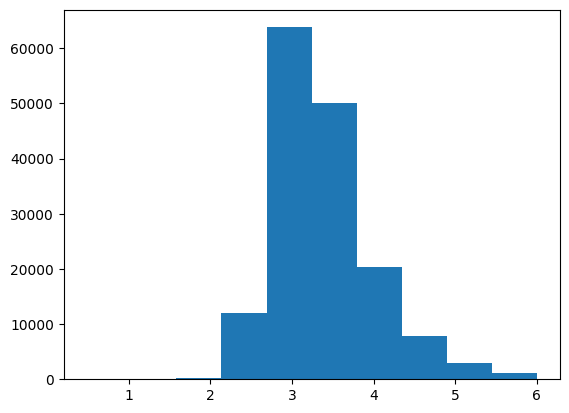

In [17]:
Genres['popularity'] = Popularity
print(max(Popularity),min(Popularity),np.median(Popularity))
import matplotlib.pyplot as plt
plt.hist(np.log10(Popularity))

In [31]:
print(len(Genres[Genres.num==0]))
Genres[Genres.num==2][['SelectGenres','popularity']].head(20)


1012


,SelectGenres,popularity
57,"[non-fiction, ebook]",1389
90,"[fantasy, charlie-bone]",585
99,"[arabic, non-fiction]",3840
137,"[fiction, mystery]",784
146,"[historical-fiction, fiction]",394
374,"[romance, serie]",901
375,"[busines, non-fiction]",204
591,"[science-fiction, dystopia]",798
594,"[classici, letteratura-italiana]",310
617,"[fiction, contemporary]",941


In [19]:
import re
RE_D = re.compile('\d')
pattern = re.compile('[^a-z-]')
def f3(string):
    return bool(RE_D.search(string))

Genres.SelectGenres[32][:]
AllGenres=set()
for i in range(len(Genres)):
  for text in Genres.SelectGenres[i]:

    if not f3(text) and text.count("-")<2: 
      s = re.sub(pattern, '', text)
      AllGenres.add(s)
print(len(AllGenres))
#AllGenres
[element for element in AllGenres if  'phys' in element]

27058


['physics-cosmology',
 'science-physic',
 'physical-book',
 'physiological',
 'physical-health',
 'physical-fitnes',
 'physics-mathematic',
 'physical-science',
 'physical-tbr',
 'metaphysical',
 'physiology',
 'physical-copy',
 'theoretical-physic',
 'physician',
 'physical',
 'math-physic',
 'physics-astronomy',
 'astronomy-physic',
 'metaphysic',
 'astrophysic',
 'physic',
 'physics-math',
 'physics-science',
 'physicist',
 'metaphysical-spiritual',
 'quantum-physic']

In [87]:
import re
RE_D = re.compile('\d')
pattern = re.compile('[^a-z-]')
def f3(string):
    return bool(RE_D.search(string))

Genres.SelectGenres[32][:]
AllGenres2=set()
for i in range(len(Genres)):
  for text in Genres.SelectGenres[i]:

    if not f3(text) and text.count("-")==2: #>2 mostly nonesense
      s = re.sub(pattern, '', text)
      AllGenres2.add(s)
print(len(AllGenres2))
#AllGenres2
[element for element in AllGenres2 if  'his' in element]

5458


['cold-war-history',
 'historical-fiction-mystery',
 'history-middle-age',
 'early-modern-history',
 'historical-christian-fiction',
 'g-historical-fiction',
 'pulitzer-prize-history',
 'historical-fiction-rome',
 'history-of-marriage',
 'christian-historical-fiction',
 'middle-eastern-history',
 'historical-fiction-romance',
 'native-american-history',
 'art-history-mystery',
 'kids-historical-fiction',
 'genre-historical-fiction',
 'historical-romance-medieval',
 'with-this-ring',
 'art-historical-fiction',
 'united-states-history',
 'his-fair-assassin',
 'history-and-politic',
 'historical-erotic-romance',
 'genre-romance-historical',
 'for-his-pleasure',
 'african-american-history',
 'series-whiskey-creek',
 'history-cold-war',
 'history-non-fiction',
 'women-s-history',
 'historical-crime-fiction',
 'adult-historical-mystery',
 'history-historical-fiction',
 'historical-christian-romance',
 'western-historical-romance',
 'history-american-revolution',
 'san-francisco-history',
 'm

In [ ]:
1-  Romance = ['roman']-['history-roman','romania', 'no-romance','cizgi-roman']
2-  Mystery = [element for element in AllGenres if  'myst' in element and 'chemyst' not in element]
3-  Thriller = [element for element in AllGenres if  'thril' in element]
4-  Horror = [element for element in AllGenres if  'horro' in element or 'horre' in element]
5-  Science Fiction = [element for element in AllGenres if  (('sci' in element or 'sci-' in element) and ('fi' in element or 'fan' in element) and 'non' not in element) or element=='sf']
6-  Fantasy = [element for element in AllGenres if  'fant' in element]
7-  Historical Fiction
8-  Non-fiction=['nonfi','non-fi']
9-  Biography/Autobiography
10- Memoir
11- Self-help
12- Young Adult = [element for element in AllGenres if  'ya-' in element[:3] or '-ya' in element[-3:] or element=='ya']  +'young-' or 'young'+'adult'
13- Children's = 
14- Poetry
15- Drama/Plays
16- Satire  = [element for element in AllGenres if  'satir' in element]
17- Comedy/Humor
18- Action/Adventure
Crime/Detective
Western
Religious/Spiritual
Travel
Science/Nature
Philosophy
Art/Architecture
Cookbooks
Business/Finance =
Education/Instructional [element for element in AllGenres if  'educat' in element or element=='edu'],'how-to','dummie','teach','instruct'
Sports/Fitness   = [element for element in AllGenres if  'fitn' in element]  , [element for element in AllGenres if  'sport' in element and element!="transportation"] + ball?
Music/Theater

In [26]:
#[element for element in AllGenres if  'ya-' in element[:3] or '-ya' in element[-3:] or element=='ya']
#[element for element in AllGenres if  'young' in element]# or '-ya' in element[-3:] or element=='ya']
#[element for element in AllGenres if  (('sci' in element or 'sci-' in element) and ('fi' in element or 'fan' in element) and 'non' not in element) or element=='sf'] -scientific
#[element for element in AllGenres if  'finan' in element or element=='fin']
#[element for element in AllGenres if  'busi' in element or element=='fin'] #- abusive busiek 

['scientific-method',
 'sf',
 'scientific',
 'sciencefiction',
 'sci-fi',
 'scifi-military',
 'scifi',
 'hard-scifi',
 'science-fiction',
 'fiction-science',
 'scifi-futuristic',
 'fantascienza',
 'tbr-scifi',
 'scifi-romance',
 'sci-fifantasy',
 'fiction-scifi',
 'military-scifi',
 'classic-scifi',
 'ya-scifi',
 'mm-scifi',
 'science-fantasy',
 'fantasy-scifi',
 'sci-fiction',
 'scifi-fantasy']

In [ ]:
Genres.to_csv(filepath+'GenresPop.csv')
#Genres=pd.read_csv(filepath+'GenresPop.csv')
#Genres['gen_num']=map(lambda x: int(x),Genres['gen_num'])
Genres.head(10)


,book_id,genres,gen_num,SelectGenres,num,popularity
0,7327624,"[to-read, fantasy, fiction, owned, hardcover, ...","[58, 15, 6, 5, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1...","[fantasy, fiction]",2,157
1,6066819,"[to-read, chick-lit, currently-reading, fictio...","[7615, 728, 673, 404, 152, 119, 82, 76, 72, 72...","[chick-lit, fiction, jennifer-weiner, chicklit...",66,11416
2,287149,"[to-read, currently-reading, occult, philosoph...","[961, 78, 22, 21, 16, 13, 12, 8, 8, 7, 5, 4, 4...","[occult, philosophy, religion, satanism, non-f...",6,1263
3,6066814,"[to-read, historical-fiction, mystery, histori...","[159, 12, 11, 10, 7, 6, 5, 3, 3, 3, 3, 2, 2, 2...","[historical-fiction, mystery, historical-myste...",6,322
4,33394837,"[currently-reading, netgalley, kindle, read-20...","[54, 8, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,...",[netgalley],1,175
5,89375,"[to-read, currently-reading, non-fiction, reli...","[9381, 874, 340, 140, 112, 99, 88, 88, 88, 84,...","[non-fiction, religion, nonfiction, spiritual,...",80,12645
6,89376,"[to-read, currently-reading, theology, christi...","[6393, 1206, 130, 95, 88, 77, 59, 50, 44, 40, ...","[theology, christian-life, christian, non-fict...",32,8803
7,89377,"[to-read, historical-fiction, currently-readin...","[4248, 258, 141, 81, 77, 67, 62, 57, 56, 50, 4...","[historical-fiction, newbery, young-adult, mid...",68,5946
8,89378,"[to-read, picture-books, animals, children-s-b...","[450, 64, 26, 22, 21, 20, 18, 17, 16, 12, 12, ...","[picture-books, animals, children-s-books, chi...",19,886
9,6158967,"[to-read, currently-reading, non-fiction, soci...","[362, 25, 24, 10, 9, 8, 8, 7, 6, 4, 4, 3, 2, 2...","[non-fiction, society, politics, history, econ...",7,571


In [ ]:
#Genres.gen_num[0]
genre = list(Genres.SelectGenres)
genre

[['fantasy', 'fiction'],
 ['chick-lit',
  'fiction',
  'jennifer-weiner',
  'chicklit',
  'book-club',
  'friendship',
  'adult-fiction',
  'chic-lit',
  'adult',
  'contemporary',
  'library',
  'default',
  'women-s-fiction',
  'audiobooks',
  'contemporary-fiction',
  'audio',
  'my-books',
  'audiobook',
  'romance',
  'general-fiction',
  'audio-book',
  'humor',
  'ebooks',
  'womens-fiction',
  'novels',
  'have',
  'did-not-finish',
  'drama',
  'audio-books',
  'guilty-pleasures',
  'book-club-books',
  'books-i-have',
  'weiner',
  '2010-books',
  'library-book',
  'women',
  'relationships',
  'mystery',
  'fluff',
  'chick',
  'borrowed',
  'my-library',
  'wish-list',
  'finished',
  'on-my-shelf',
  'didn-t-finish',
  'ebook',
  '2009-books',
  'dysfunctional-families',
  'family',
  'abandoned',
  'e-books',
  'adult-books',
  'weiner-jennifer',
  'coming-of-age',
  'audible',
  'paperback',
  'books',
  'on-the-shelf',
  'purchased',
  'lit',
  'friends',
  'bullying',


In [ ]:
def titles(id):
    return books.title[books.book_id==str(id)].values
titles(1870)
#books.title[books.book_id=='1870'].values

array(['Nickel and Dimed'], dtype=object)

In [ ]:
Genres_list = Genres['genres'].tolist()
test=Genres_list[3:5]
Gennum_list = Genres['gen_num'].tolist()
testnum=Gennum_list[3:5]
testnum

[['159',
  '12',
  '11',
  '10',
  '7',
  '6',
  '5',
  '3',
  '3',
  '3',
  '3',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1'],
 ['54',
  '8',
  '5',
  '3',
  '3',
  '3',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '2',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',

In [ ]:
All_Genres = sum(testnum, [])
All_Genres

TypeError: ignored

80426
CPU times: user 49.2 ms, sys: 5.23 ms, total: 54.5 ms
Wall time: 53.8 ms


8     1560
9     1544
10    1372
11    1309
12    1300
13    1269
15    1174
14    1159
16    1127
18    1102
17    1033
20     991
19     983
21     907
22     898
23     867
25     860
27     809
24     803
26     764
29     758
28     742
30     740
31     666
32     636
33     636
35     623
37     566
38     562
39     558
34     549
36     547
44     519
41     515
42     515
40     513
46     480
45     476
43     462
47     433
Name: ratings_count, dtype: int64

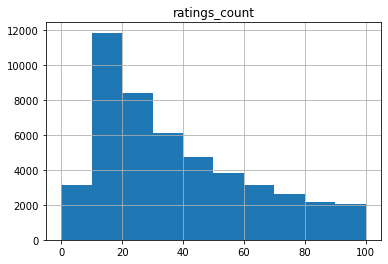

In [ ]:
%%time
print(len(books))
books.hist(column='ratings_count', range=[0, 100])
ratecnt=books.ratings_count.value_counts()
ratecnt.head(40)

In [ ]:
books.duplicated(subset=['title','author_id']).value_counts()

False    52167
True     28259
dtype: int64

8min 29s ± 2min 59s per loop (mean ± std. dev. of 7 runs, 1 loop each)


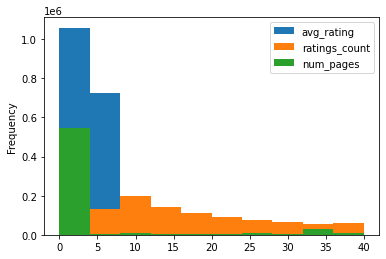

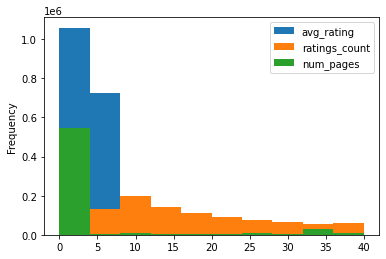

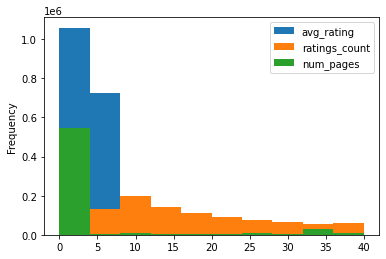

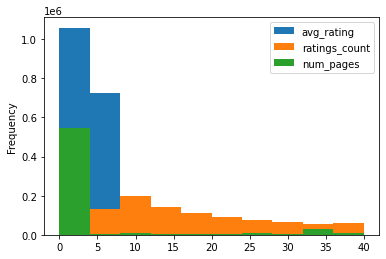

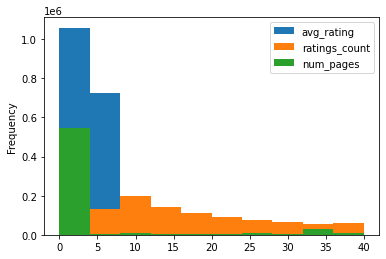

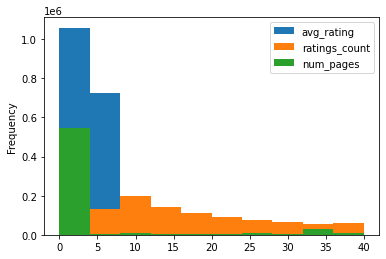

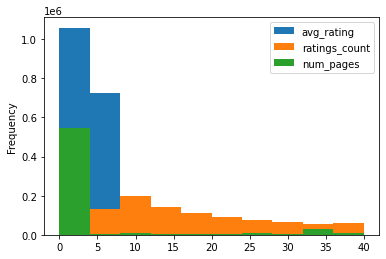

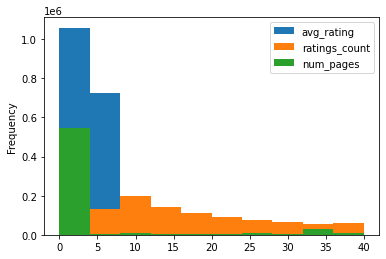

In [ ]:
%%time
books.plot.hist('ratings_count', range=[0, 40])